# Figure 4 - what drives concentration fluctuations?
It is believed that density fluctuations are driven by the correlation between density field and velocity field. This correlation has been investigated by Saintillan and Shelly (

* concentration field $c$
* velocity field $v$
* velocity divergence $\nabla \cdot v$
* source field $\nabla \cdot (c\boldsymbol{n})$
* another source field $\nabla \cdot (c\boldsymbol{v})$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import myImageLib as mil
from skimage import io, measure
import pandas as pd
from scipy.signal import savgol_filter, medfilt
import os
import corrLib as cl
from scipy.signal import savgol_filter
import matplotlib as mpl
from numpy.polynomial.polynomial import polyvander
from scipy.optimize import curve_fit
from miscLib import label_slope
from scipy import signal
from scipy.interpolate import griddata
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_scalebar.scalebar import SI_LENGTH
import matplotlib as mpl
import pandas as pd

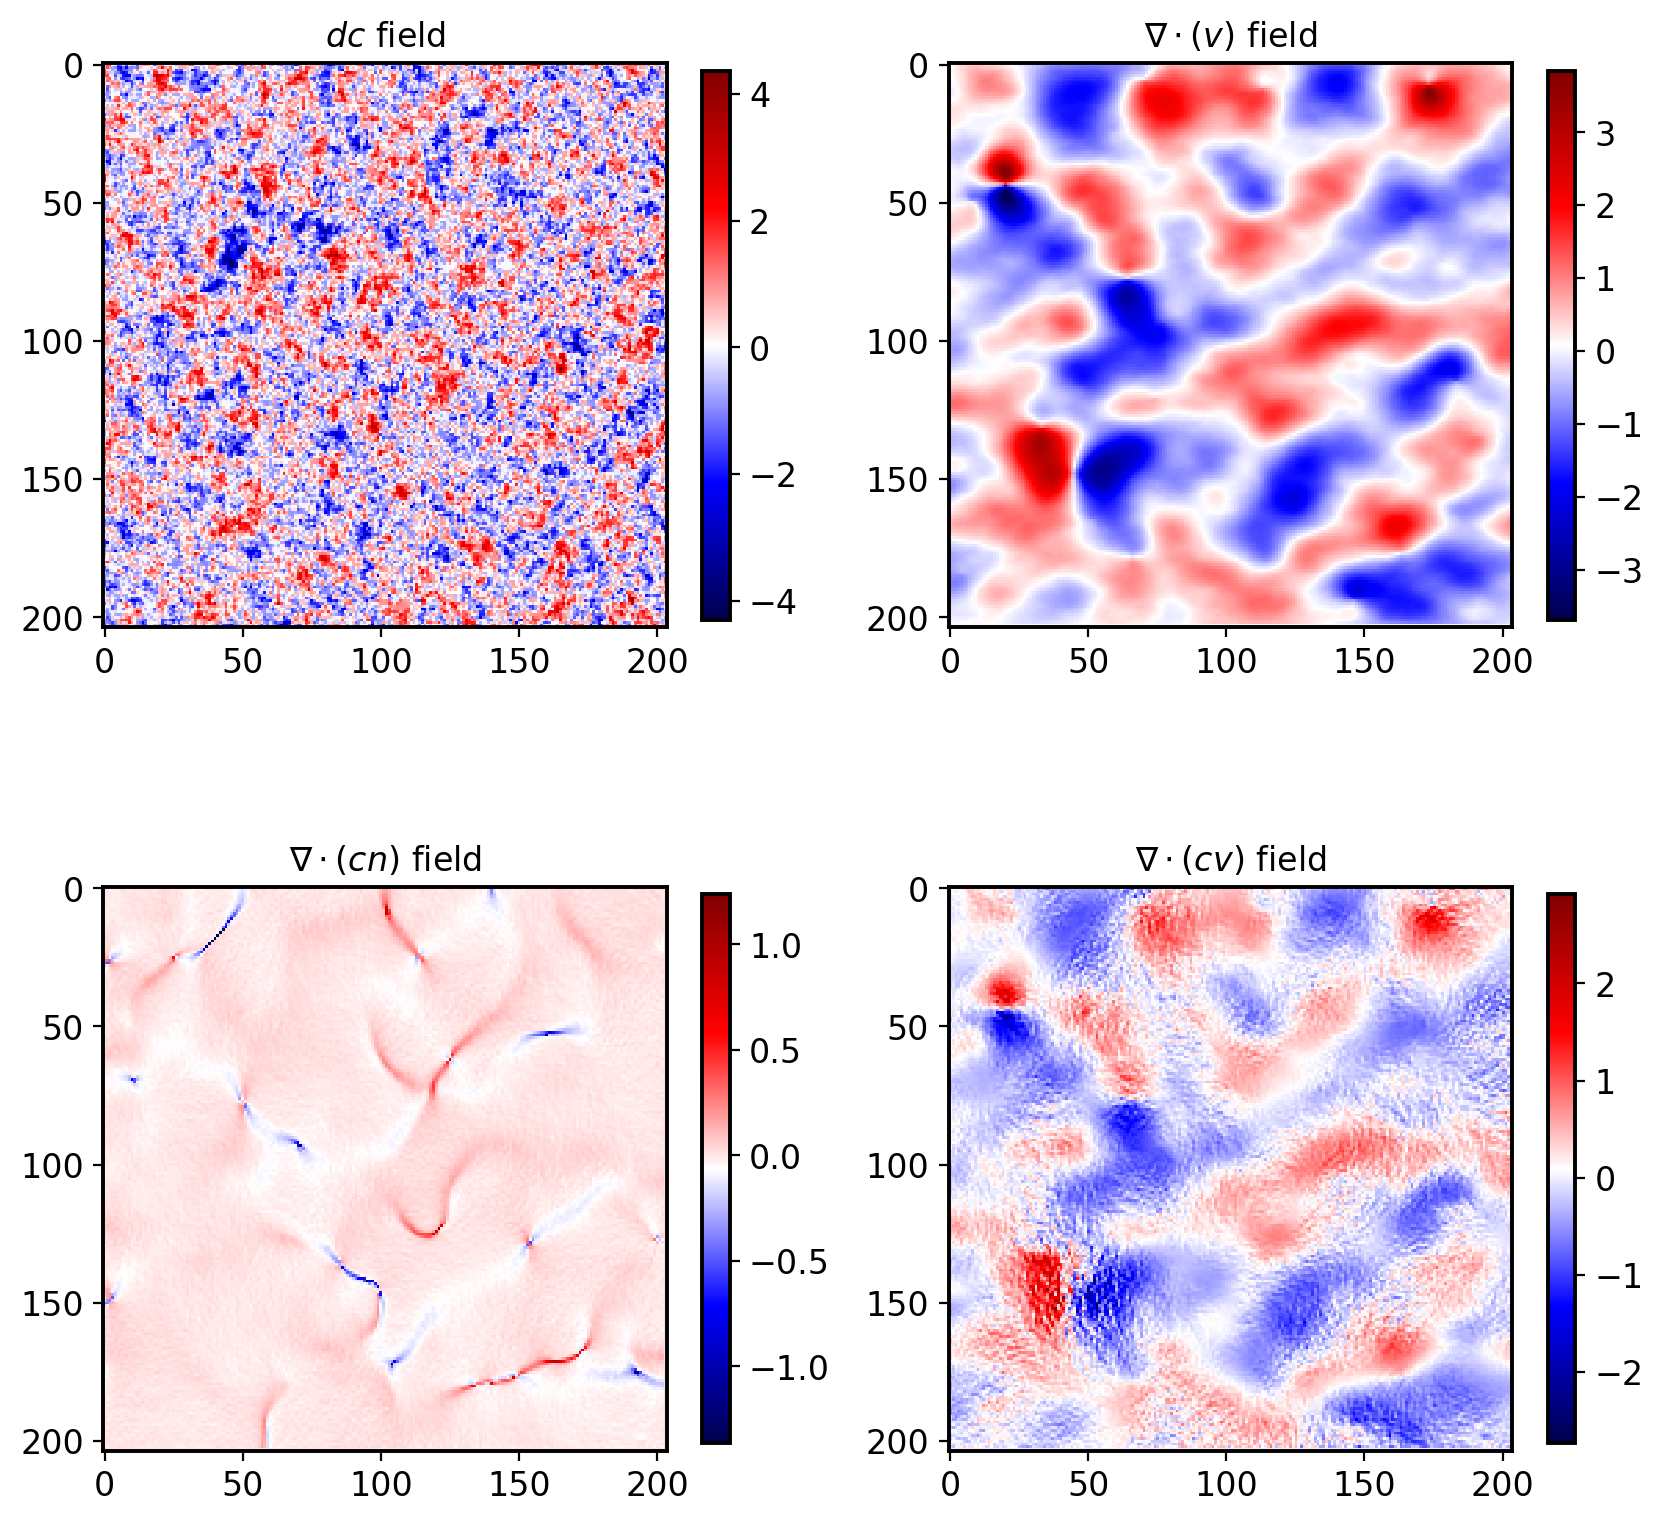

In [40]:
Dir = r'D:\Wei\Dynamics_raw\piv_result_10\80\900-901.csv'
img_folder = r'D:\Wei\Dynamics_raw\80'
dc_folder = r'D:\Wei\Dynamics_raw\80_diff'
dif = 10
pivData = pd.read_csv(Dir)
folder, file = os.path.split(Dir)
name_ind = file.find('-')
name = file[0: name_ind]

# dc = np.load(os.path.join(dc_folder, name + '.npy'))
imgDir = os.path.join(img_folder, name + '.tif')
imgDir1 = os.path.join(img_folder, str(int(int(name)+dif)) + '.tif')
img = io.imread(imgDir)
img1 = io.imread(imgDir1)
c, v, divcn, divcv, divv = cl.div_field(img, pivData, 10, 10)
X, Y, I0 = cl.divide_windows(img0, windowsize=[10, 10], step=10)
X, Y, I1 = cl.divide_windows(img1, windowsize=[10, 10], step=10)
dc = I1.astype('int32')-I0.astype('int32')
dc = signal.correlate2d(dc, mil.matlab_style_gauss2D((11, 11)), mode='same')
# Plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=200)
ax[0, 0].imshow(dc, cmap='seismic')
ax[0, 0].set_title('$dc$ field')
ax[0, 1].imshow(divv, cmap='seismic')
ax[0, 1].set_title('$\\nabla\cdot(v)$ field')
ax[1, 0].imshow(divcn, cmap='seismic')
ax[1, 0].set_title('$\\nabla\cdot(cn)$ field')
ax[1, 1].imshow(divcv, cmap='seismic')
ax[1, 1].set_title('$\\nabla\cdot(cv)$ field')

normdc = mpl.colors.Normalize(vmin=dc.min(), vmax=dc.max())
normv = mpl.colors.Normalize(vmin=divv.min(), vmax=divv.max())
normcv = mpl.colors.Normalize(vmin=divcv.min(), vmax=divcv.max())
normcn = mpl.colors.Normalize(vmin=divcn.min(), vmax=divcn.max())

plt.colorbar(mpl.cm.ScalarMappable(norm=normdc, cmap='seismic'), ax=ax[0, 0], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normv, cmap='seismic'), ax=ax[0, 1], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normcn, cmap='seismic'), ax=ax[1, 0], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normcv, cmap='seismic'), ax=ax[1, 1], shrink=0.8, drawedges=False)

# Coarse-grain the density field

Text(0.5, 1.0, 'dif = 10')

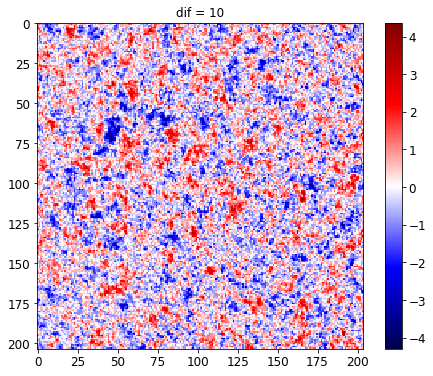

In [39]:
name = '900'
dif = 10
plt.figure(figsize=(8, 6))
img_folder = r'E:\Google Drive\data_share\Dynamics_raw\80'
img0 = io.imread(os.path.join(img_folder, '900.tif'))
img1 = io.imread(os.path.join(img_folder, str(int(int(name)+dif)) + '.tif'))
X, Y, I0 = cl.divide_windows(img0, windowsize=[10, 10], step=10)
X, Y, I1 = cl.divide_windows(img1, windowsize=[10, 10], step=10)
dc = I1.astype('int32')-I0.astype('int32')
dc = signal.correlate2d(dc, mil.matlab_style_gauss2D((11, 11)), mode='same')
plt.imshow(dc, cmap='seismic')
plt.colorbar()
plt.title('dif = {}'.format(dif))

# Difference between 16-bit and 8-bit

In [50]:
img16 = io.imread(r'D:\Wei\02042020\80-1\16-bit\0000.tif')
img8 = io.imread(r'D:\Wei\02042020\80-1\8-bit\0000.tif')

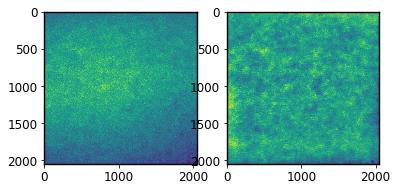

In [64]:
bp = mil.bpass(img8, 3, 100)
bp_mh = cl.match_hist(bp, img8)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img8)
ax[1].imshow(bp_mh)

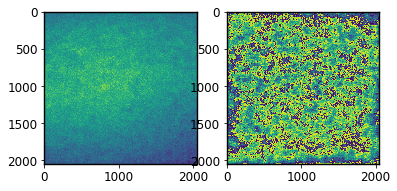

In [60]:
bp = mil.bpass(img16, 3, 100)
bp_mh = cl.match_hist(bp, img16)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img16)
ax[1].imshow(bp_mh)

# Where are the features?

## Try smoothing density fields and calculate difference

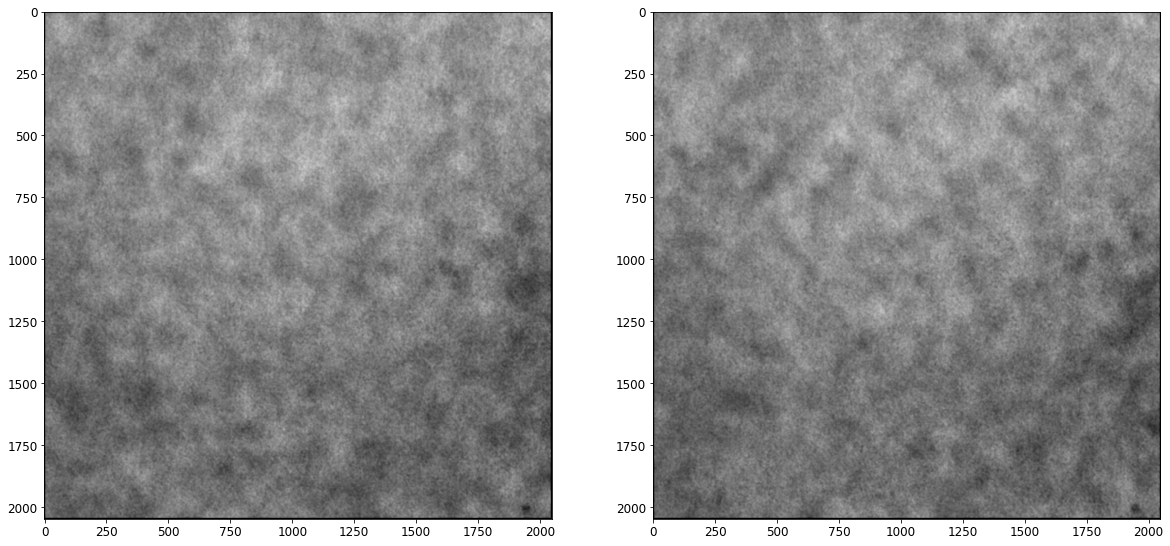

In [34]:
folder = r'E:\Google Drive\data_share\Dynamics_raw\80'
I0 = io.imread(os.path.join(folder, '900.tif'))
I1 = io.imread(os.path.join(folder, '920.tif'))
sm0 = signal.convolve2d(I0, mil.matlab_style_gauss2D(shape=(51, 51), sigma=3), mode='same')
sm1 = signal.convolve2d(I1, mil.matlab_style_gauss2D(shape=(51, 51), sigma=3), mode='same')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(sm0, vmin=149, vmax=172, cmap='gray')
ax[1].imshow(sm1, vmin=149, vmax=172, cmap='gray')

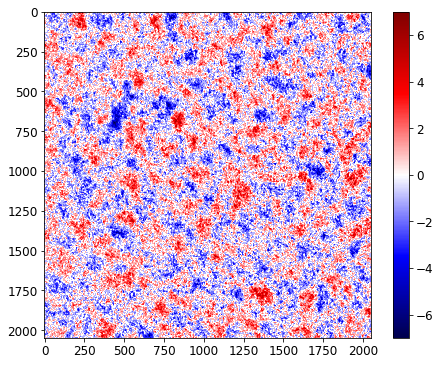

In [32]:
plt.figure(figsize=(8, 6))
plt.imshow(sm1.astype('int16')-sm0.astype('int16'), cmap='seismic')
plt.colorbar()